In [1]:
import sys
sys.path.append(sys.path[0].replace('/Development Notebooks',''))
from group_decomposition import fragfunctions as ff
# from group_decomposition.utils import mol_from_molfile, set_scaffold_params, get_scaffold_vertices, find_smallest_rings, xyz_from_cml
import rdkit
from rdkit import Chem, rdBase
from rdkit.Chem import BRICS
from rdkit.Chem import AllChem #used for 3d coordinates
from rdkit.Chem import Draw,rdDepictor
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D
from rdkit.Chem.Scaffolds import rdScaffoldNetwork # scaffolding
from rdkit import RDPaths
from rdkit.Chem.Draw import rdMolDraw2D
import numpy as np
from group_decomposition import utils
from rdkit.Chem.Scaffolds import rdScaffoldNetwork


In [2]:
# %time frags = ff.identify_connected_fragments('/Users/chemlab/Documents/Retrievium Work/Scaffolding/group_decomposition/Development Notebooks/DUDE_33392010_mmp13_decoys_C24H28ClN5O6_CIR.cml',input_type='cmlfile')
from collections import Counter
Counter(tuple([('C', 33, 4), ('C', 10, 4), ('H', 4, 1), ('H', 4, 1), ('H', 4, 1), ('H', 4, 1),  ('H', 4, 1)])) == Counter(tuple([('C', 33, 4), ('C', 10, 4), ('H', 4, 1), ('H', 4, 1), ('H', 4, 1), ('H', 4, 1),  ('H', 4, 1)]))

True

,Smiles,Molecule,numAttachments,Atoms,xyz,Labels,atom_types
0,[21*]C,,1,"[19, 52, 53, 54]","[[-0.809822382, -3.4302241433, 2.8994706371], ...","[C, H, H, H]","[(C, 14, 4), (H, 4, 1), (H, 4, 1), (H, 4, 1)]"
1,[14*]C[22*],,2,"[20, 55, 56]","[[-1.1215849969, -1.0006433638, -1.5865910414]...","[C, H, H]","[(C, 29, 4), (H, 4, 1), (H, 4, 1)]"
2,[12*]c1ccc([13*])cc1,,2,"[4, 5, 6, 7, 8, 9, 40, 41, 42, 43]","[[5.876143883, 0.6678420871, 0.7493641221], [4...","[C, C, C, C, C, C, H, H, H, H]","[(C, 30, 3), (C, 19, 3), (C, 19, 3), (C, 27, 3..."
3,[19*][NH+]([20*])[21*],,3,"[16, 17]","[[-0.9254676648, -3.659191976, 1.4369912865], ...","[N, H]","[(N, 35, 4), (H, 5, 1)]"
4,[20*]C,,1,"[18, 49, 50, 51]","[[-1.5357934174, -4.9834286331, 1.1472732454],...","[C, H, H, H]","[(C, 14, 4), (H, 4, 1), (H, 4, 1), (H, 4, 1)]"
5,[13*]NC(=S)N([18*])[22*],,3,"[10, 11, 12, 13, 44]","[[2.2447506754, -1.2396376371, -0.216284905], ...","[N, C, S, N, H]","[(N, 19, 3), (C, 57, 3), (S, 4, 1), (N, 24, 3)..."
6,[14*]c1cc2c([15*])cc([16*])cc2[nH]c1=O,,3,"[21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 3...","[[-2.2412103762, -0.3119015705, -0.8409622716]...","[C, C, C, C, C, C, C, C, N, C, O, H, H, H, H]","[(C, 24, 3), (C, 19, 3), (C, 24, 3), (C, 24, 3..."
7,[15*]C,,1,"[34, 63, 64, 65]","[[-3.1415221233, 3.8828129953, -1.5309332422],...","[C, H, H, H]","[(C, 10, 4), (H, 4, 1), (H, 4, 1), (H, 4, 1)]"
8,[17*]CC,,1,"[2, 1, 35, 36, 37, 38, 39]","[[8.0370585473, 1.5598182067, 0.2522142779], [...","[C, C, H, H, H, H, H]","[(C, 33, 4), (C, 10, 4), (H, 4, 1), (H, 4, 1),..."
9,[18*]CC[19*],,2,"[14, 15, 45, 46, 47, 48]","[[0.1937651904, -2.9452951438, -0.705581252], ...","[C, C, H, H, H, H]","[(C, 29, 4), (C, 29, 4), (H, 4, 1), (H, 4, 1),..."

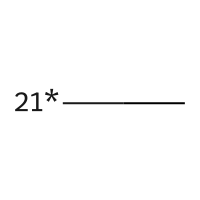
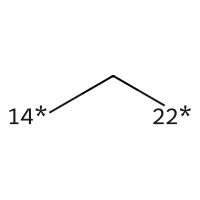
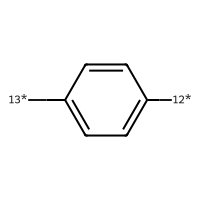
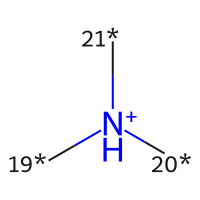
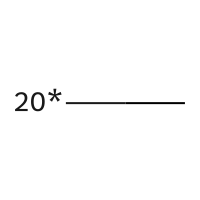
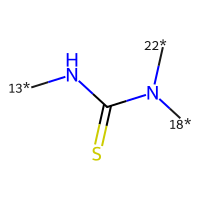
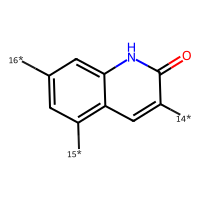
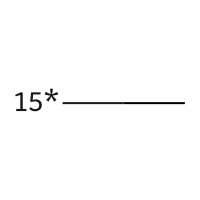
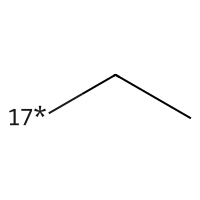
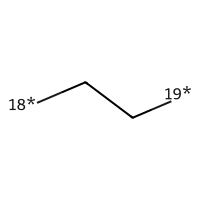
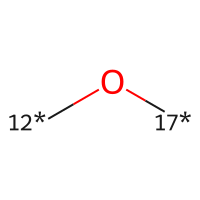
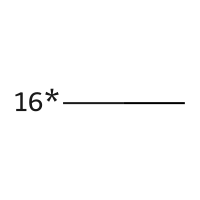

In [16]:
frags = ff.identify_connected_fragments('at_ty_unique.cml',input_type='cmlfile')
frags

,Smiles,xyz,Atoms,Labels,atom_types,Molecule,count,numAttachments
0,*c1cc(*)c2cc(*)c(=O)[nH]c2c1,"[[-2.2412103762, -0.3119015705, -0.8409622716]...","[21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 3...","[C, C, C, C, C, C, C, C, N, C, O, H, H, H, H]","[(C, 24, 3), (C, 19, 3), (C, 24, 3), (C, 24, 3...",,2,3
1,*CC*,"[[0.1937651904, -2.9452951438, -0.705581252], ...","[14, 15, 45, 46, 47, 48]","[C, C, H, H, H, H]","[(C, 29, 4), (C, 29, 4), (H, 4, 1), (H, 4, 1),...",,2,2
2,*NC(=S)N(*)*,"[[2.2447506754, -1.2396376371, -0.216284905], ...","[10, 11, 12, 13, 44]","[N, C, S, N, H]","[(N, 19, 3), (C, 57, 3), (S, 4, 1), (N, 24, 3)...",,2,3
3,*C*,"[[-1.1215849969, -1.0006433638, -1.5865910414]...","[20, 55, 56]","[C, H, H]","[(C, 29, 4), (H, 4, 1), (H, 4, 1)]",,2,2
4,*C,"[[-1.5357934174, -4.9834286331, 1.1472732454],...","[18, 49, 50, 51]","[C, H, H, H]","[(C, 14, 4), (H, 4, 1), (H, 4, 1), (H, 4, 1)]",,8,1
5,*c1ccc(*)cc1,"[[5.876143883, 0.6678420871, 0.7493641221], [4...","[4, 5, 6, 7, 8, 9, 40, 41, 42, 43]","[C, C, C, C, C, C, H, H, H, H]","[(C, 30, 3), (C, 19, 3), (C, 19, 3), (C, 27, 3...",,2,2
6,*[NH+](*)*,"[[-0.9254676648, -3.659191976, 1.4369912865], ...","[16, 17]","[N, H]","[(N, 35, 4), (H, 5, 1)]",,2,3
7,*O*,"[[7.0034620587, 1.2594573414, 1.1649823203]]",[3],[O],"[(O, 12, 2)]",,2,2
8,*CC,"[[8.0370585473, 1.5598182067, 0.2522142779], [...","[2, 1, 35, 36, 37, 38, 39]","[C, C, H, H, H, H, H]","[(C, 33, 4), (C, 10, 4), (H, 4, 1), (H, 4, 1),...",,2,1

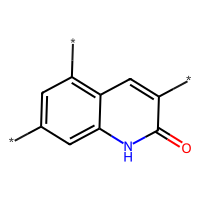
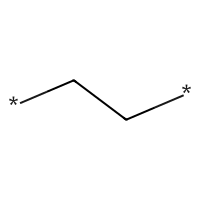
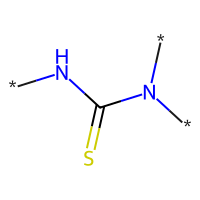
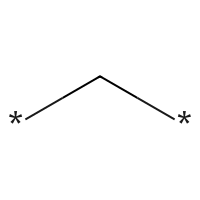
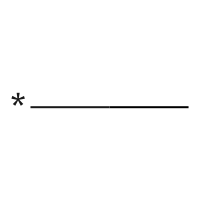
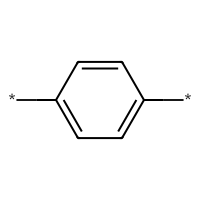
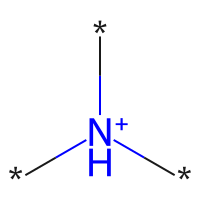
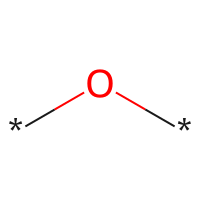
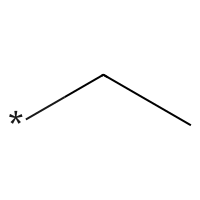

In [4]:
frame_1 = ff.count_uniques(frags,uni_smi_type=True)
frame_2 = ff.count_uniques(frags,uni_smi_type=True)
ff.count_uniques(ff.merge_uniques(frame_1,frame_2),uni_smi_type=False)

In [5]:
cml_file = 'at_ty_unique.cml'


In [6]:
smile='COC(=O)[C@@H](n1c(=O)n2n(c1=O)[C@@H](C=CC2)C(=O)NCc1ccc([nH+]c1C)N)C[NH2+]C1CCCCC1'
mol = Chem.MolFromSmiles(smile)
mol = Chem.AddHs(mol)
Chem.MolToSmiles(mol)

'[H]C1=C([H])[C@@]([H])(C(=O)N([H])C([H])([H])c2c([H])c([H])c(N([H])[H])[n+]([H])c2C([H])([H])[H])n2c(=O)n([C@]([H])(C(=O)OC([H])([H])[H])C([H])([H])[N+]([H])([H])C3([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C3([H])[H])c(=O)n2C1([H])[H]'

In [7]:
# Chem.MolFromSmiles(Chem.MolToSmiles(Chem.FragmentOnBonds(mol,bondIndices=bb)).split('.'))

In [8]:
# mol_frame.loc[0]

In [9]:
mol,atom_symbols,xyz_coords,types = utils.mol_from_cml('/Users/chemlab/Documents/Retrievium Work/Scaffolding/group_decomposition/Development Notebooks/DUDE_00425887_dhi1_actives_C19H15F3N4_CIR.cml')
{atom.GetSymbol():atom.GetFormalCharge() for atom in mol.GetAtoms() if atom.GetFormalCharge()!=0}
# ff.generate_full_molframe_v2(mol)

{}

In [10]:
# ff.identify_connected_fragments('/Users/chemlab/Documents/Retrievium Work/Scaffolding/group_decomposition/Development Notebooks/DUDE_00425887_dhi1_actives_C19H15F3N4_CIR.cml',input_type='cmlfile')

In [11]:
mol = Chem.MolFromSmiles('C(=O)[O-]')
{atom.GetSymbol():atom.GetFormalCharge() for atom in mol.GetAtoms() if atom.GetFormalCharge()!=0}

{'O': -1}

In [12]:
ff.fragment_molecule([mol],patt='[!#0;R:1]-!@[!#0;!#1:2]')

In [13]:
xyz_coords, at_types, bond_list,el_list,charge = utils.data_from_cml('/Users/chemlab/Documents/Retrievium Work/Scaffolding/group_decomposition/Development Notebooks/DUDE_63350531_mmp13_decoys_C27H25N3O6_CIR.cml',True)
rwmol = utils.add_cml_atoms_bonds(el_list,bond_list)

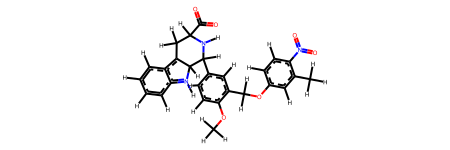

In [14]:
rwmol

In [15]:
for atom in rwmol.GetAtoms():
    utils.charge_nitrogen(atom)

AttributeError: module 'group_decomposition.utils' has no attribute 'charge_nitrogen'

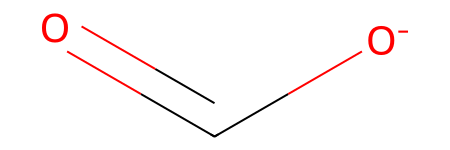

In [ ]:
mol

In [ ]:
xyz_coords, at_types, bond_list,el_list,charge = utils.data_from_cml('/Users/chemlab/Documents/Retrievium Work/Scaffolding/group_decomposition/Development Notebooks/DUDE_00425887_dhi1_actives_C19H15F3N4_CIR.cml',True)
bond_list


[(2, 1, 'S'),
 (1, 27, 'S'),
 (1, 28, 'S'),
 (1, 29, 'S'),
 (2, 3, 'S'),
 (2, 26, 'S'),
 (3, 4, 'D'),
 (3, 30, 'S'),
 (4, 5, 'A'),
 (4, 31, 'S'),
 (5, 6, 'A'),
 (5, 26, 'A'),
 (6, 7, 'S'),
 (6, 23, 'A'),
 (8, 7, 'A'),
 (21, 7, 'S'),
 (8, 9, 'A'),
 (9, 10, 'D'),
 (10, 11, 'S'),
 (21, 10, 'S'),
 (11, 12, 'A'),
 (11, 16, 'A'),
 (12, 13, 'A'),
 (12, 32, 'S'),
 (13, 14, 'A'),
 (13, 33, 'S'),
 (14, 15, 'A'),
 (14, 34, 'S'),
 (15, 16, 'A'),
 (15, 35, 'S'),
 (16, 17, 'S'),
 (18, 17, 'S'),
 (19, 17, 'S'),
 (20, 17, 'S'),
 (21, 22, 'S'),
 (22, 36, 'S'),
 (22, 37, 'S'),
 (22, 38, 'S'),
 (23, 24, 'A'),
 (23, 39, 'S'),
 (24, 25, 'A'),
 (24, 40, 'S'),
 (25, 26, 'A'),
 (25, 41, 'S')]

In [ ]:
# cml_file = '/Users/chemlab/Documents/Retrievium Work/Scaffolding/group_decomposition/Development Notebooks/DUDE_16737368_kif11_decoys_C30H21N5O_CIR.cml'
# %time ff.identify_connected_fragments(cml_file,input_type='cmlfile')
#PROBLEM WITH CARBOXYLATE IN THIS MOLECULE


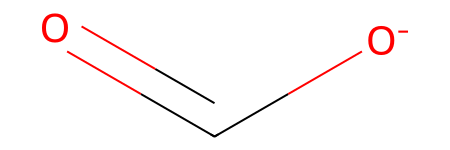

In [ ]:
mol

In [ ]:
ff.generate_molecule_fragments(mol,patt='[!#0;R:1]-!@[!#0;!#1:2]')

In [ ]:
# cml_file='/Users/chemlab/Documents/Retrievium Work/Scaffolding/group_decomposition/Development Notebooks/DUDE_16737368_kif11_decoys_C30H21N5O_CIR.cml'
# xyz_coords, at_types, bond_list,el_list,charge = utils.data_from_cml(cml_file,True)
# rwmol = utils.add_cml_atoms_bonds(el_list,bond_list)
# rwmol.GetCharge()

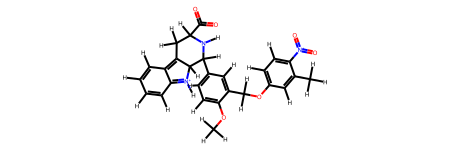

In [ ]:
for atom in rwmol.GetAtoms():
    utils.charge_nitrogen(atom)
rwmol.UpdatePropertyCache()
Chem.GetSymmSSSR(rwmol)
rwmol

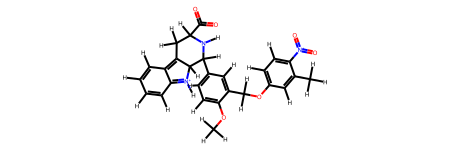

In [ ]:
rwmol

In [ ]:
'<scalar dataType="xsd:string">O=C1/C(=C\c2cn(nc2c2ccncc2)c2ccccc2)/C(=NN1c1ccccc1)c1ccccc1</scalar>'.split('>')[1].split('<')[0]

'O=C1/C(=C\\c2cn(nc2c2ccncc2)c2ccccc2)/C(=NN1c1ccccc1)c1ccccc1'

In [ ]:
smile = utils.smiles_from_cml('/Users/chemlab/Documents/Retrievium Work/Scaffolding/group_decomposition/Development Notebooks/DUDE_13489372_cah2_decoys_C24H35N7O5_CIR.cml')
charge_ats = utils.get_charged_at_dict(smile)
charge_ats

[{'symbol': 'N',
  'charge': 1,
  'neighbors': [('C', ('C', 'N', 'N')), ('C', ('C', 'C', 'N')), ('H', ('N',))],
  'bonds': [<rdkit.Chem.rdchem.Bond at 0x11ffaf3e0>,
  'bondTypes': [('C', 'N', rdkit.Chem.rdchem.BondType.AROMATIC),
   ('N', 'C', rdkit.Chem.rdchem.BondType.AROMATIC),
   ('N', 'H', rdkit.Chem.rdchem.BondType.SINGLE)],
  'aromaticity': True,
  'in_ring': True},
 {'symbol': 'N',
  'charge': 1,
  'neighbors': [('C', ('C', 'H', 'H', 'N')),
   ('C', ('C', 'C', 'H', 'N')),
   ('H', ('N',)),
   ('H', ('N',))],
  'bonds': [<rdkit.Chem.rdchem.Bond at 0x11ffaf4c0>,
  'bondTypes': [('C', 'N', rdkit.Chem.rdchem.BondType.SINGLE),
   ('N', 'C', rdkit.Chem.rdchem.BondType.SINGLE),
   ('N', 'H', rdkit.Chem.rdchem.BondType.SINGLE),
   ('N', 'H', rdkit.Chem.rdchem.BondType.SINGLE)],
  'aromaticity': False,
  'in_ring': False}]

In [ ]:
cml_file = '/Users/chemlab/Documents/Retrievium Work/Scaffolding/group_decomposition/Development Notebooks/DUDE_13489372_cah2_decoys_C24H35N7O5_CIR.cml'
xyz_coords, at_types, bond_list,el_list,charge = utils.data_from_cml(cml_file,True)
rwmol = utils.add_cml_atoms_bonds(el_list,bond_list)
# map(charge_nitrogen,rwmol.GetAtoms())
smile = utils.smiles_from_cml(cml_file)
charge_ats = utils.get_charged_at_dict(smile)
utils.id_charge_atoms(rwmol,charge_ats)
rwmol.GetNum

{'mol_atom': [6, 28], 'list_el': [0, 1]}

In [ ]:
[x.GetTotalValence() for x in Chem.MolFromSmiles('c1ccoc1').GetAtoms()]

[4, 4, 4, 2, 4]

In [ ]:
mol = Chem.AddHs(Chem.MolFromSmiles(smile))
mol
patt = '[$([nX3;R;+]:[cX3]:[cx3])]'
mol.HasSubstructMatch(Chem.MolFromSmarts(patt))

False

In [ ]:
in_mol = Chem.MolFromInchi('InChI=1S/C24H33N7O5/c1-15-16(10-11-20(25)28-15)13-27-21(32)18-9-6-12-29-23(34)30(24(35)31(18)29)19(22(33)36-2)14-26-17-7-4-3-5-8-17/h6,9-11,17-19,26H,3-5,7-8,12-14H2,1-2H3,(H2,25,28)(H,27,32)/p+2/t18-,19-/m0/s1')

In [ ]:
for atom in in_mol.GetAtoms():
    print(f'Index is {atom.GetIdx()}, charge is {atom.GetFormalCharge()}, atom in Ring? {atom.IsInRing()},numneighs {len(atom.GetNeighbors())}')

Index is 0, charge is 0, atom in Ring? False,numneighs 1
Index is 1, charge is 0, atom in Ring? False,numneighs 1
Index is 2, charge is 0, atom in Ring? True,numneighs 2
Index is 3, charge is 0, atom in Ring? True,numneighs 2
Index is 4, charge is 0, atom in Ring? True,numneighs 2
Index is 5, charge is 0, atom in Ring? True,numneighs 2
Index is 6, charge is 0, atom in Ring? True,numneighs 2
Index is 7, charge is 0, atom in Ring? True,numneighs 2
Index is 8, charge is 0, atom in Ring? True,numneighs 2
Index is 9, charge is 0, atom in Ring? True,numneighs 2
Index is 10, charge is 0, atom in Ring? True,numneighs 2
Index is 11, charge is 0, atom in Ring? True,numneighs 2
Index is 12, charge is 0, atom in Ring? False,numneighs 2
Index is 13, charge is 0, atom in Ring? False,numneighs 2
Index is 14, charge is 0, atom in Ring? True,numneighs 3
Index is 15, charge is 0, atom in Ring? True,numneighs 3
Index is 16, charge is 0, atom in Ring? True,numneighs 3
Index is 17, charge is 0, atom in Rin

In [ ]:
in_mol.GetAtomWithIdx(25).GetBonds()[1].GetBondType()

rdkit.Chem.rdchem.BondType.SINGLE

In [ ]:
list(zip([1,2,3],['C','N','O'],['single','double','triple']))

[(1, 'C', 'single'), (2, 'N', 'double'), (3, 'O', 'triple')]

In [ ]:
aro_idx = [x.GetIdx() for x in atom.GetBonds() if x.GetBondTypeAsDouble()==1.5]

False

In [ ]:
0. in [0,1,2]

True

In [ ]:
mol = Chem.MolFromSmiles('OS(=O)(=O)O')
[x.GetSymbol() for x in mol.GetAtoms()]

['O', 'S', 'O', 'O', 'O']

In [ ]:
mol.GetAtomWithIdx(1).GetTotalValence()

6

In [ ]:
Chem.MolFromSmiles('Cc1ccc(cc1C)N2C(=O)/C(=C/c3cc(n(c3C)c4ccc(cc4)Br)C)/C(=NC2=S)[O-]')

NameError: name 'Chem' is not defined